<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_QuantumML_QML_pennylane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math, Python, Optimization, Machine learning, Quantum computing = **Quantum Machine Learning**

Vamos treinar um circuito para um modelo da função seno

In [2]:
pip install pennylane

     |████████████████████████████████| 756 kB 5.0 MB/s 
     |████████████████████████████████| 305 kB 53.5 MB/s 
     |████████████████████████████████| 108 kB 54.1 MB/s 


In [3]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [5]:
#criando o treinamento

X = np.linspace(0, 2*np.pi, 5) 
X.requires_grad = False
Y = np.sin(X)

#teste

X_test = np.linspace(0.2, 2*np.pi+0.2, 5)
Y_test = np.sin(X_test)

In [6]:
#dispositivo

dev = qml.device('default.qubit', wires=1) 


In [7]:
#criando o circuito quantico

@qml.qnode(dev)
def quantum_circuit(datapoint, params):

    qml.RX(datapoint, wires=0)
  
    qml.Rot(params[0], params[1], params[2], wires=0)
   
    return qml.expval(qml.PauliZ(wires=0))

/usr/local/lib/python3.7/dist-packages/pennylane/_grad.py:100: UserWarning: Starting with PennyLane v0.21.0, when using Autograd, inputs have to explicitly specify requires_grad=True (or the argnum argument must be passed) in order for trainable parameters to be identified.
  UserWarning,


Step = 0 Cost = 4.912499465469816
Step = 10 Cost = 0.017712616264714008
Step = 20 Cost = 0.0010549650559468187
Step = 30 Cost = 0.00033478390918248945
Step = 40 Cost = 0.00019081038150773098
Step = 50 Cost = 0.00012461609775916144
Step = 60 Cost = 8.781349557163865e-05
Step = 70 Cost = 6.52239822689002e-05
Step = 80 Cost = 5.0362401887342866e-05
Step = 90 Cost = 4.0063867053839383e-05


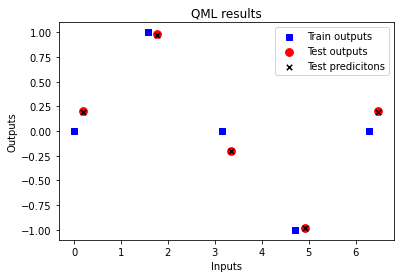

In [15]:
# Classical Pre/Postprocessing

def loss_func(predictions):

  total_losses = 0
  for i in range(len(Y)):
      output = Y[i]
      prediction = predictions[i]
      loss = (prediction - output)**2
      total_losses += loss
  return total_losses

def cost_fn(params): 

    predictions = [quantum_circuit(x, params)  for x in X]
  
    cost = loss_func(predictions)
    return cost

opt = qml.GradientDescentOptimizer(stepsize=0.3)
params = [0.1,0.1,0.1]

for i in range (100):
 
    params, prev_cost = opt.step_and_cost(cost_fn,params) 
    if i%10 == 0:
       
        print(f'Step = {i} Cost = {cost_fn(params)}')


test_predictions = []
for x_test in X_test:
    prediction = quantum_circuit(x_test,params)
    test_predictions.append(prediction)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, Y, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test,Y_test, s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(X_test,test_predictions, s=30, c='k', marker="x", label='Test predicitons')
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right');
plt.show()



WoW!! QML !!!